## Problem Statement - Credit Data Analysis

Refer here for the presentation of the insights gained via this analysis:
https://github.com/hr4hkr/DSprojects/blob/main/Credit%20EDA%20Analysis%20Insights.pdf

### Data Cleaning

In [1571]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import re
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [247]:
file_path = r"C:\Users\rhari\Downloads\credit eda assignment\columns_description.csv"
desc = pd.read_csv(file_path, encoding="ISO-8859-1")

In [249]:
new_file_path=r"C:\Users\rhari\Downloads\credit eda assignment\columns_description2.csv"
desc.to_csv(new_file_path, index=False, encoding="utf-8")


In [251]:
df1=pd.read_csv("application_data.csv")

In [252]:
df1.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

We will separate each variable based on their type for ease of analysis

In [254]:
object_cols=df1.select_dtypes(include='object').columns
int_cols=df1.select_dtypes(include='int64').columns
float_cols=df1.select_dtypes(include='float64').columns

Checking for null values.
Need to identify collumns with more than 30% as null and remove them

In [256]:
empty_col=df1.isnull().sum()
empty_col=empty_col[empty_col.values>(0.3*len(empty_col))]
len(empty_col)

64

##### 64 collumns with >30% null values

In [258]:
# Removing these collumns
df1.drop(labels=empty_col.index,axis=1, inplace=True)

In [259]:
df1.isnull().sum()/len(df1)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


AMT_ANNUITY collumn still has null values, hence handling them by imputing them 

In [261]:
df1.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [262]:
df1.AMT_ANNUITY.quantile([0.5,0.75, 0.9, 0.95, 0.99])

0.50    24903.0
0.75    34596.0
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

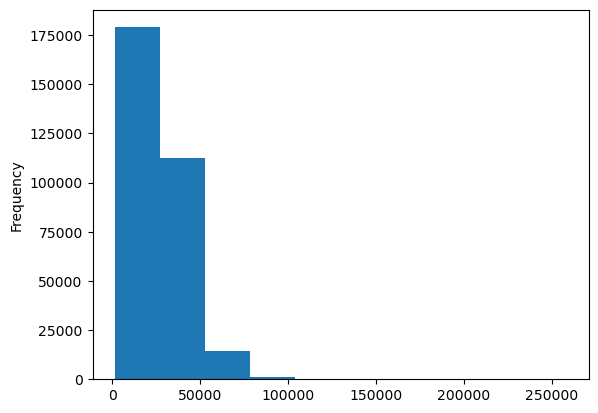

In [263]:
df1["AMT_ANNUITY"].plot.hist()
plt.show()

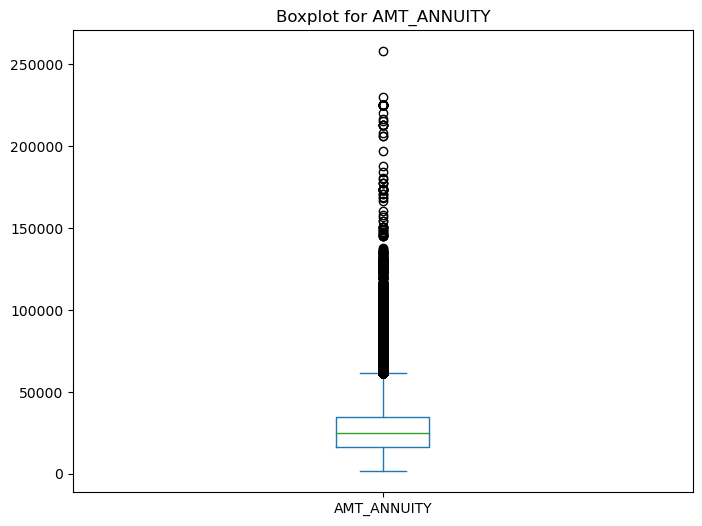

In [264]:
plt.figure(figsize=(8, 6))
df1["AMT_ANNUITY"].plot(kind="box")
plt.title('Boxplot for AMT_ANNUITY')
plt.show()

In [265]:
#### since there are outliers in the variable we will use median value and impute the null values

df1.AMT_ANNUITY.fillna(value=df1.AMT_ANNUITY.median(),inplace=True)

In [269]:
df1.isnull().sum()/len(df1)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


###### AMT_ANNUTIY null values are imputed.
We can see that there are null values present in variables CNT_FAM_MEMBERS, DAYS_LAST_PHONE_CHANGE as well.
However, we will be deciding on the relevancy of all variables based on their description and will address the remaining two variables then. 

In [280]:
### analysis each variables for relevancy
for value in int_cols:
    print(value)

SK_ID_CURR
TARGET
CNT_CHILDREN
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21


In [282]:
for i in range(2,22):
    ind="FLAG_DOCUMENT_"+str(i)
    print(df1[ind].value_counts())

FLAG_DOCUMENT_2
0    307498
1        13
Name: count, dtype: int64
FLAG_DOCUMENT_3
1    218340
0     89171
Name: count, dtype: int64
FLAG_DOCUMENT_4
0    307486
1        25
Name: count, dtype: int64
FLAG_DOCUMENT_5
0    302863
1      4648
Name: count, dtype: int64
FLAG_DOCUMENT_6
0    280433
1     27078
Name: count, dtype: int64
FLAG_DOCUMENT_7
0    307452
1        59
Name: count, dtype: int64
FLAG_DOCUMENT_8
0    282487
1     25024
Name: count, dtype: int64
FLAG_DOCUMENT_9
0    306313
1      1198
Name: count, dtype: int64
FLAG_DOCUMENT_10
0    307504
1         7
Name: count, dtype: int64
FLAG_DOCUMENT_11
0    306308
1      1203
Name: count, dtype: int64
FLAG_DOCUMENT_12
0    307509
1         2
Name: count, dtype: int64
FLAG_DOCUMENT_13
0    306427
1      1084
Name: count, dtype: int64
FLAG_DOCUMENT_14
0    306608
1       903
Name: count, dtype: int64
FLAG_DOCUMENT_15
0    307139
1       372
Name: count, dtype: int64
FLAG_DOCUMENT_16
0    304458
1      3053
Name: count, dtype: int64
FLA

We see that most applicants are having the data for each document submitted as "NO". Since this is not going to provide any insights into the dependance of submission of documents and defaulting we will mark all FLAG_DOCUMENT variables as irrelevant along with the ones in the below list.

In [285]:
# Dropping irrelevant collumns
cols_irrelevant= ["CNT_FAM_MEMBERS","DAYS_LAST_PHONE_CHANGE","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","HOUR_APPR_PROCESS_START","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"]
df1.drop(labels=cols_irrelevant,axis=1,inplace=True)

In [287]:
df1.shape

(307511, 23)

In [291]:
object_cols=df1.select_dtypes(include='object').columns
int_cols=df1.select_dtypes(include='int64').columns
float_cols=df1.select_dtypes(include='float64').columns

In [293]:
for i in object_cols:
    print(df1[i].value_counts())
    print("____________________________________________")

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
____________________________________________
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
____________________________________________
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
____________________________________________
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
____________________________________________
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64
____________________________________________
NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    381

Upon analyzing the object collumns we cannot find any irrelevant collumn.

However, we noticed that in variables CODE_GENDER and ORGANIZATION_TYPE there is a value "XNA" present. These values indicate a null value and hence needs to be handled

In [297]:
df1.CODE_GENDER.describe()

count     307511
unique         3
top            F
freq      202448
Name: CODE_GENDER, dtype: object

In [299]:
df1.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [301]:
df1["CODE_GENDER"]=df1.apply(lambda x: "F" if x["CODE_GENDER"]=="XNA" else x["CODE_GENDER"], axis =1)

In [302]:
df1.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [303]:
df1.ORGANIZATION_TYPE.describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [307]:
100 * (len(df1[df1["ORGANIZATION_TYPE"]=="XNA"])/len(df1))

18.00716071945394

Since, XNA is the second highest occuring organisation type it cannot be imputed with any of the other groups as this will significantly skew the data. However, since it comprises of only 18% of  the total dataset we will drop these collumns.


In [310]:
drop_cull_orgtype=df1[df1["ORGANIZATION_TYPE"]=="XNA"]

In [312]:
df1.drop(index=df1.loc[df1.ORGANIZATION_TYPE=="XNA"].index, inplace=True)

In [314]:
df1.shape

(252137, 23)

In [318]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'ORGANIZATION_TYPE'],
      dtype='object')

In [320]:
df1.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
WEEKDAY_APPR_PROCESS_START     object
REG_REGION_NOT_LIVE_REGION      int64
REG_CITY_NOT_LIVE_CITY          int64
ORGANIZATION_TYPE              object
dtype: object

In [322]:
df1.AMT_INCOME_TOTAL.describe()

count    2.521370e+05
mean     1.759141e+05
std      2.588516e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [324]:
df1.AMT_INCOME_TOTAL.quantile([0.25,0.5,0.75,0.9,0.95,0.99])

0.25    112500.0
0.50    157500.0
0.75    211500.0
0.90    270000.0
0.95    355334.4
0.99    517500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In order to better understand continuous variables, we will be binning these variables into 4 income categories as below. We will use quantile based binning to get an idea of concentration of risk wrt to income within each quantile

In [327]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,House / apartment,0.018801,-9461,-637,-3648.0,-2120,WEDNESDAY,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,House / apartment,0.003541,-16765,-1188,-1186.0,-291,MONDAY,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,House / apartment,0.010032,-19046,-225,-4260.0,-2531,MONDAY,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,WEDNESDAY,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,THURSDAY,0,0,Religion


In [329]:
quants=[0,0.25,0.5,0.75,0.9,0.95,0.99]
df1['Income_Slot'] = pd.qcut(df1['AMT_INCOME_TOTAL'], q=quants,labels=slots)

In [331]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,Income_Slot
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.018801,-9461,-637,-3648.0,-2120,WEDNESDAY,0,0,Business Entity Type 3,Lower-middle income
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.003541,-16765,-1188,-1186.0,-291,MONDAY,0,0,School,Upper-middle income
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.010032,-19046,-225,-4260.0,-2531,MONDAY,0,0,Government,Very Low Income
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.008019,-19005,-3039,-9833.0,-2437,WEDNESDAY,0,0,Business Entity Type 3,Low income
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.028663,-19932,-3038,-4311.0,-3458,THURSDAY,0,0,Religion,Low income


Similar to Income amount variable we will now be binning the Credit amount variable

In [333]:
# Binning Credit AMT variable
slots_credit =['Very Low Credit','Low Credit', 'Lower-middle Credit', 'Upper-middle Credit', 'High Credit', 'Very High Credit']
credit_quants=[0,0.25,0.5,0.75,0.9,0.95,0.99]
df1['Credit_Category'] = pd.qcut(df1['AMT_CREDIT'], q=credit_quants,labels=slots_credit)

In [335]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,Income_Slot,Credit_Category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-9461,-637,-3648.0,-2120,WEDNESDAY,0,0,Business Entity Type 3,Lower-middle income,Low Credit
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-16765,-1188,-1186.0,-291,MONDAY,0,0,School,Upper-middle income,High Credit
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-19046,-225,-4260.0,-2531,MONDAY,0,0,Government,Very Low Income,Very Low Credit
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-19005,-3039,-9833.0,-2437,WEDNESDAY,0,0,Business Entity Type 3,Low income,Low Credit
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-19932,-3038,-4311.0,-3458,THURSDAY,0,0,Religion,Low income,Low Credit


Dividing the dataset into two differentgroups wrt target=1(client with payment difficulties) and target=0(all other)

In [337]:
df_target0=df1.loc[df1["TARGET"]==0]
df_target1=df1.loc[df1["TARGET"]==1]

Majority of the dataset consists of records of target=1 with people struggline to pay

### Data Analysis

#### Univariate Analysis - Plotting for Clients with no payment difficulties (target=0)

In [1757]:
def plots_func(df,x,hue=None,title=None, size=(8,4), scale="linear"):
    plt.figure(figsize=size)
    plt.title(title)
    plt.yscale(scale)
    plt.xticks(rotation=45)
    sns.countplot(data=df,x=x, hue=hue)
    plt.savefig(title, bbox_inches='tight')
    plt.show()

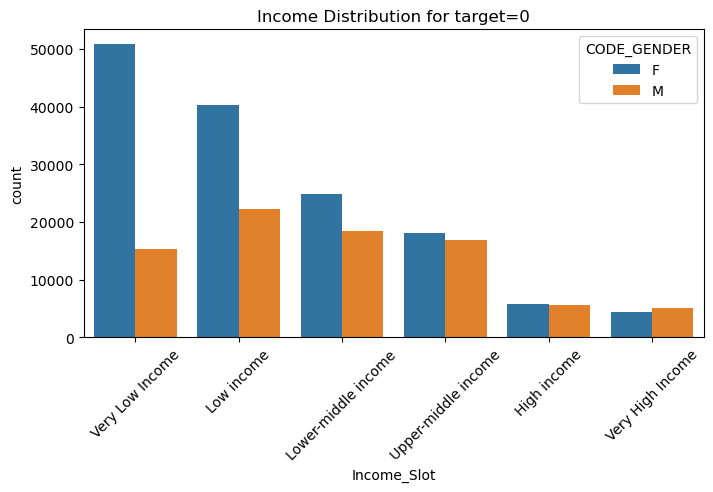

In [1759]:
plots_func(df_target0,x="Income_Slot", hue="CODE_GENDER", title="Income Distribution for target=0")

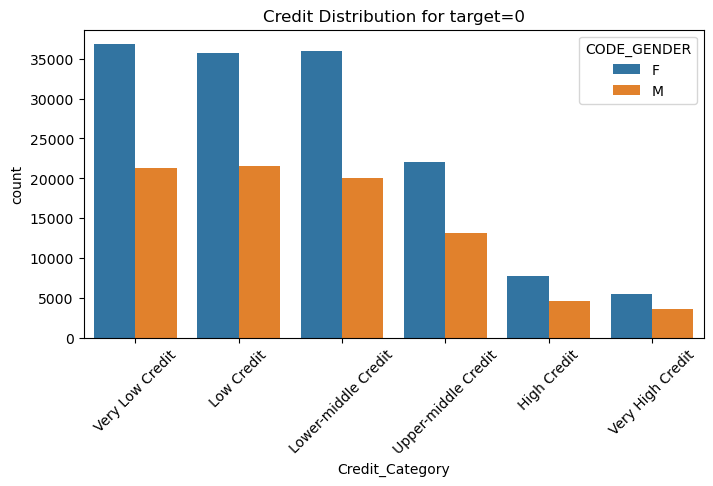

In [1761]:
plots_func(df_target0,x="Credit_Category", hue="CODE_GENDER", title="Credit Distribution for target=0")

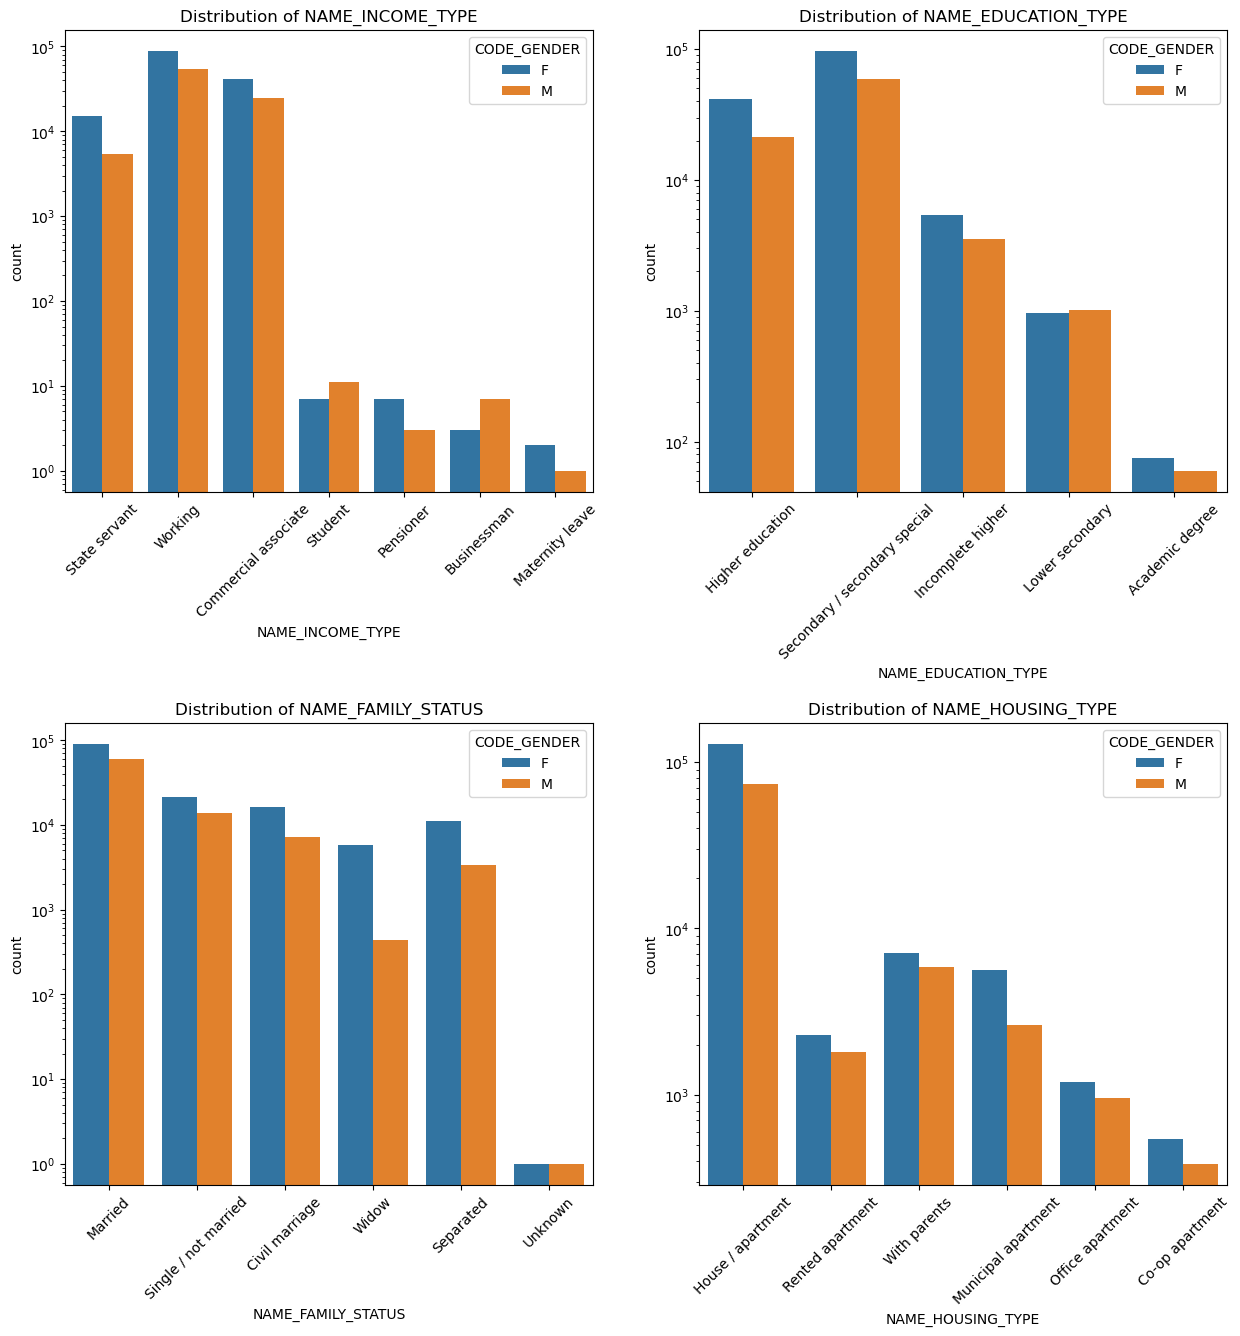

<Figure size 640x480 with 0 Axes>

In [1711]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Distribution of NAME_INCOME_TYPE")
sns.countplot(data=df_target0,x="NAME_INCOME_TYPE", hue="CODE_GENDER")

plt.subplot(2,2,2)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Distribution of NAME_EDUCATION_TYPE")
sns.countplot(data=df_target0,x="NAME_EDUCATION_TYPE", hue="CODE_GENDER")

plt.subplot(2,2,3)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Distribution of NAME_FAMILY_STATUS")
sns.countplot(data=df_target0,x="NAME_FAMILY_STATUS", hue="CODE_GENDER")

plt.subplot(2,2,4)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Distribution of NAME_HOUSING_TYPE")
sns.countplot(data=df_target0,x="NAME_HOUSING_TYPE", hue="CODE_GENDER")

plt.subplots_adjust(hspace=0.5)  # Increase hspace value to add more space between rows
plt.savefig("tar0_dist_gen.png")
plt.show()
plt.tight_layout()


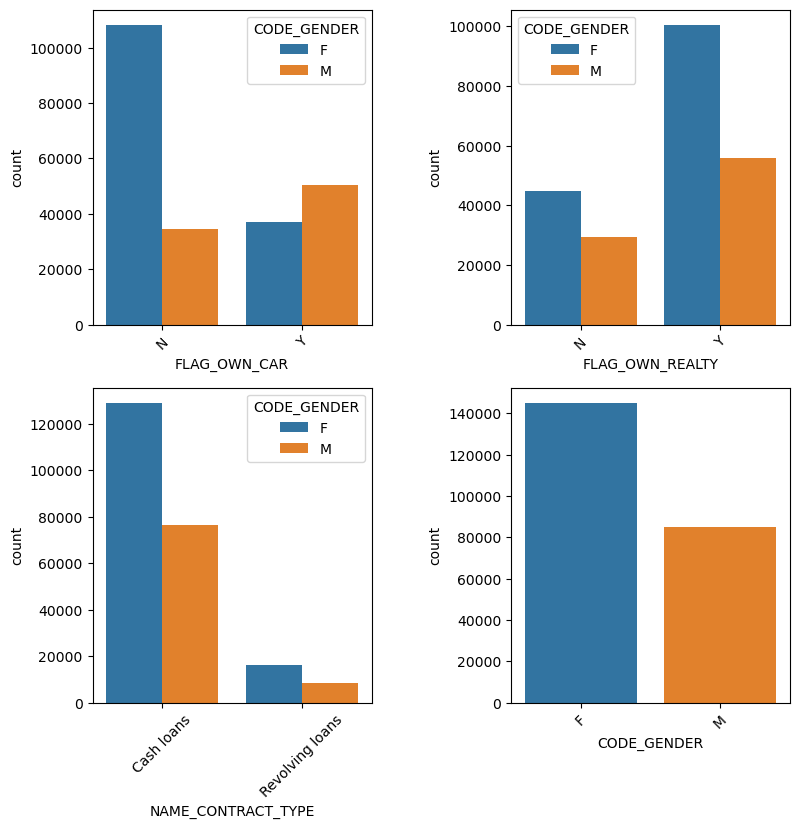

<Figure size 640x480 with 0 Axes>

In [670]:
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
plt.xticks(rotation=45)
sns.countplot(data=df_target0,x="FLAG_OWN_CAR", hue="CODE_GENDER")

plt.subplot(2,2,2)
plt.xticks(rotation=45)
sns.countplot(data=df_target0,x="FLAG_OWN_REALTY", hue="CODE_GENDER")

plt.subplot(2,2,3)
plt.xticks(rotation=45)
sns.countplot(data=df_target0,x="NAME_CONTRACT_TYPE", hue="CODE_GENDER")

plt.subplot(2,2,4)
plt.xticks(rotation=45)
sns.countplot(data=df_target0,x="CODE_GENDER")

plt.subplots_adjust(wspace=0.5)
plt.show()
plt.tight_layout()

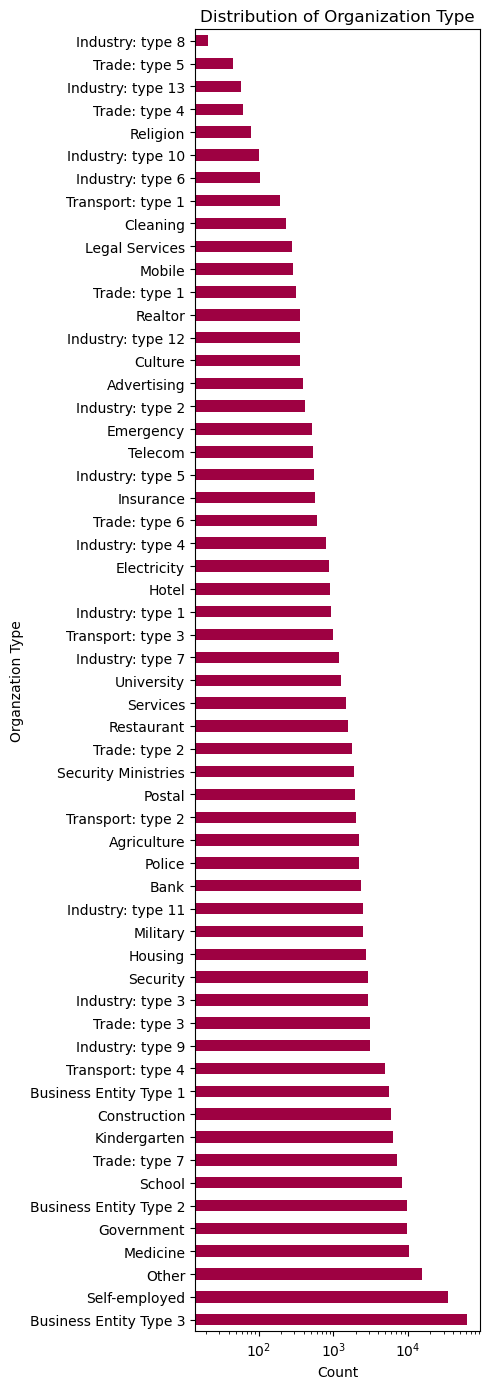

In [1723]:
plt.figure(figsize=(5,14))
plt.title("Distribution of Organization Type")
plt.xlabel("Count")
plt.xscale('log')
plt.grid(axis='x', linestyle='--')
df_target0["ORGANIZATION_TYPE"].value_counts().plot(kind="barh",xlabel="Count",ylabel="Organzation Type", colormap="Spectral")
plt.tight_layout()
plt.savefig("Distribution of Organization Type_t0.png")
plt.show()

### Observations:
1. Most applicants are Female. 
2. Income - Most applications fall within the category of Very-Low income group.
3. Credit - Most applications fall within the category of Very-Low and Lower-Middle Credit group
4. Records show that most people in the dataset belong to income type of either working or commercial associates and has their own house/apartment.
5. Major applications are of cash loans
6. Top 3 applicants are from Bussiness Entity Type 3, Self-Employed and Other - Medicine and Government follows

#### Univariate Analysis - Plotting for Clients with payment difficulties (tagret=1)

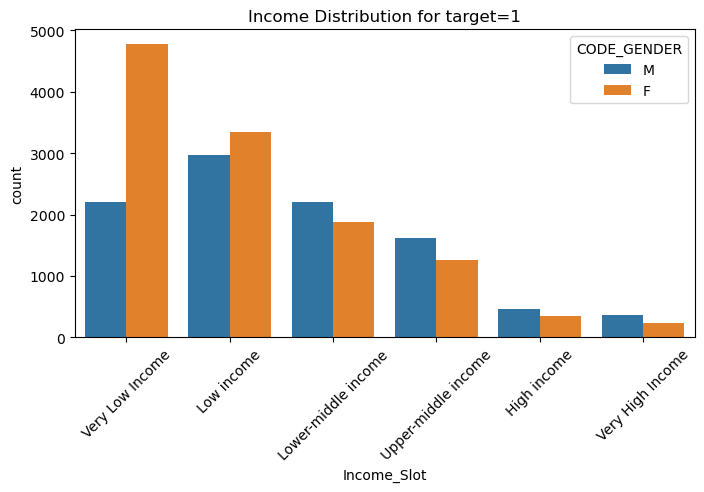

In [1763]:
plots_func(df_target1,x="Income_Slot", hue="CODE_GENDER", title="Income Distribution for target=1")

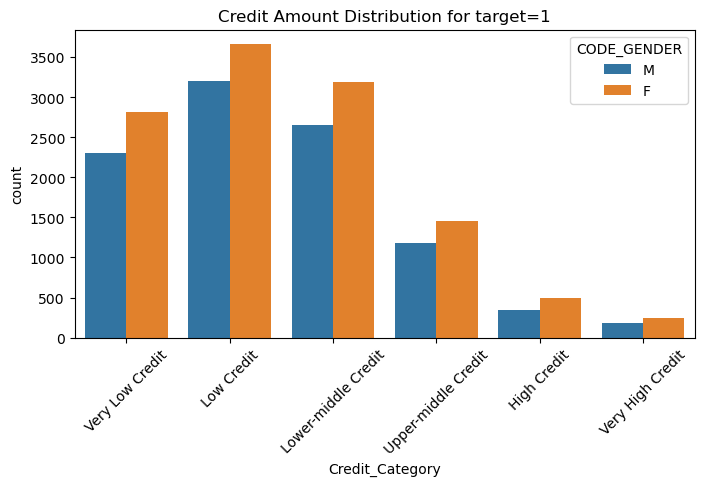

In [1765]:
plots_func(df_target1,x="Credit_Category", hue="CODE_GENDER", title="Credit Amount Distribution for target=1")

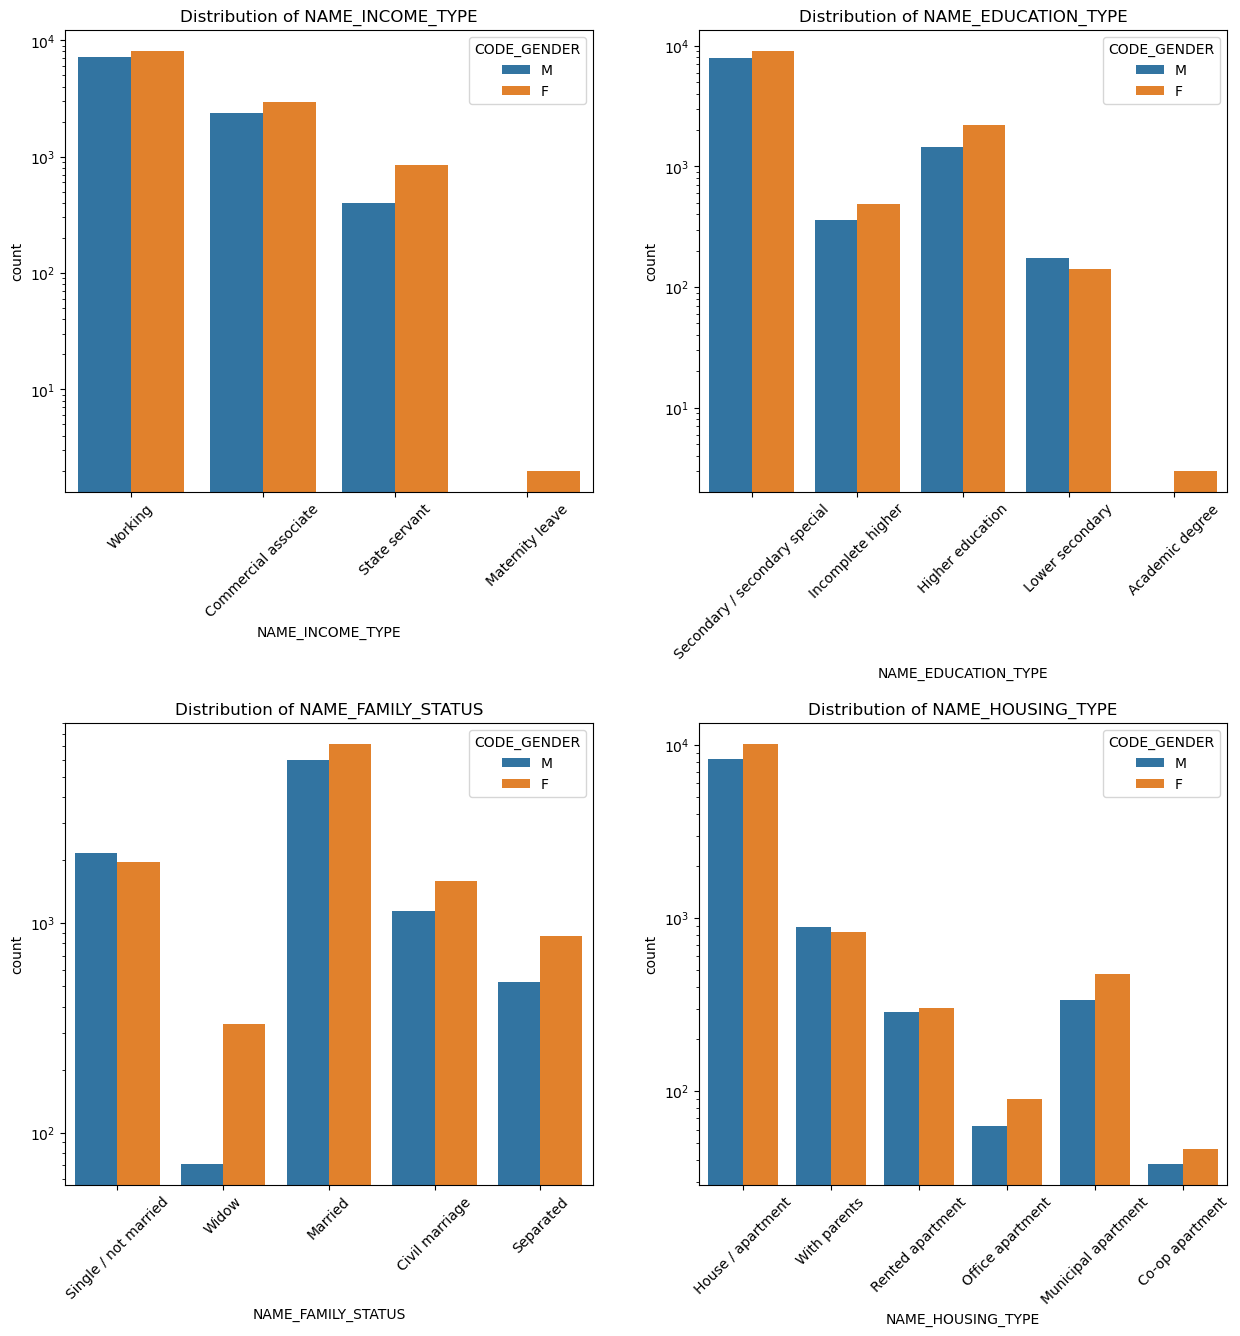

<Figure size 640x480 with 0 Axes>

In [1713]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Distribution of NAME_INCOME_TYPE")
sns.countplot(data=df_target1,x="NAME_INCOME_TYPE", hue="CODE_GENDER")

plt.subplot(2,2,2)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Distribution of NAME_EDUCATION_TYPE")
sns.countplot(data=df_target1,x="NAME_EDUCATION_TYPE", hue="CODE_GENDER")

plt.subplot(2,2,3)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Distribution of NAME_FAMILY_STATUS")
sns.countplot(data=df_target1,x="NAME_FAMILY_STATUS", hue="CODE_GENDER")

plt.subplot(2,2,4)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Distribution of NAME_HOUSING_TYPE")
sns.countplot(data=df_target1,x="NAME_HOUSING_TYPE", hue="CODE_GENDER")

plt.subplots_adjust(hspace=0.5)  # Increase hspace value to add more space between rows
plt.savefig("tar1_dist_gen.png")
plt.show()
plt.tight_layout()


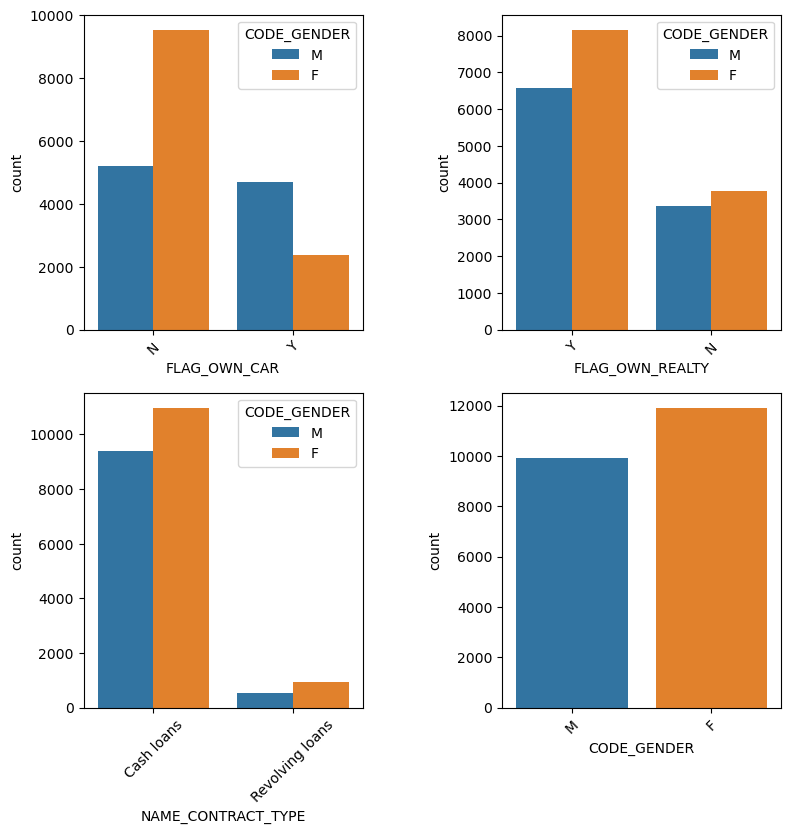

<Figure size 640x480 with 0 Axes>

In [668]:
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
plt.xticks(rotation=45)
sns.countplot(data=df_target1,x="FLAG_OWN_CAR", hue="CODE_GENDER")

plt.subplot(2,2,2)
plt.xticks(rotation=45)
sns.countplot(data=df_target1,x="FLAG_OWN_REALTY", hue="CODE_GENDER")

plt.subplot(2,2,3)
plt.xticks(rotation=45)
sns.countplot(data=df_target1,x="NAME_CONTRACT_TYPE", hue="CODE_GENDER")

plt.subplot(2,2,4)
plt.xticks(rotation=45)
sns.countplot(data=df_target1,x="CODE_GENDER")

plt.subplots_adjust(wspace=0.5)
plt.show()
plt.tight_layout()

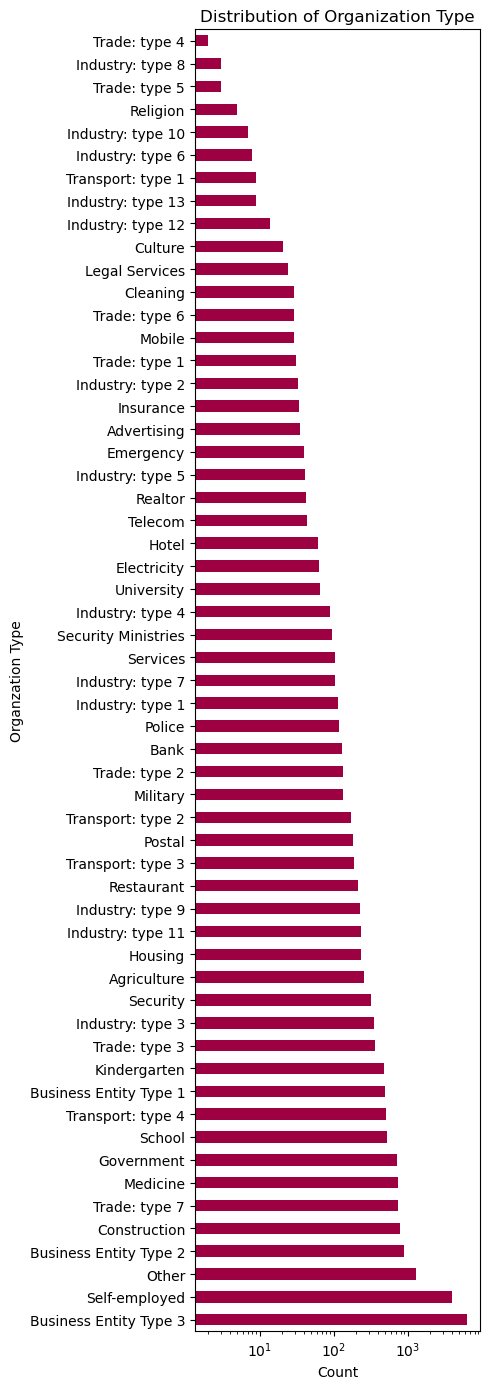

In [1725]:
plt.figure(figsize=(5,14))
plt.title("Distribution of Organization Type")
plt.xlabel("Count")
plt.xscale('log')
plt.grid(axis='x', linestyle='--')
df_target1["ORGANIZATION_TYPE"].value_counts().plot(kind="barh",xlabel="Count",ylabel="Organzation Type", colormap="Spectral")
plt.tight_layout()
plt.savefig("Distribution of Organization Type_t1.png")
plt.show()

### Observations:
1. Most applicants are Female. 
2. Income - Most applications fall within the category of Very-Low income group and consists mostly of females.
3. Credit - Most applications fall within the category of Low Credit group.
4. Most people in the dataset belong to income type working and has their own house/apartment
5. Major applications are of cash loans
6. Top 3 applicants are from Bussiness Entity Type 3, Self-Employed and Other -  Bussiness Entity Type 2 and Construction follows

#### Key Takeaways: 
1. In both types of applications, the top-3 applicants organization type is the same. However, for people struggling with repayment, the remaining two in organization type includes Bussiness Entity Type 2 and Construction.

#### Analysis of Correlation for Target=0

In [686]:
numerical_df_target0 = df_target0.select_dtypes(include=['int64','float64'])

In [701]:
numerical_df_target0.drop(columns="TARGET", inplace=True)

In [705]:
target0_corr=numerical_df_target0.corr(method='spearman')

"spearman" method is used to calculate collinearity since the data isn't necessarily normally distributed, and there also there is presence of outliers

In [707]:
target0_corr

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY
SK_ID_CURR,1.000000,0.000186,0.001347,-0.000238,0.000186,0.000262,-0.001292,-0.000211,0.000079,0.000293,-0.000701,-0.003709
CNT_CHILDREN,0.000186,1.000000,-0.021950,-0.023652,-0.010795,-0.030579,0.266534,0.030948,0.155518,-0.119164,-0.022813,0.002344
AMT_INCOME_TOTAL,0.001347,-0.021950,1.000000,0.403876,0.472204,0.110074,-0.054666,-0.060868,0.040559,-0.036702,0.077634,-0.001023
AMT_CREDIT,-0.000238,-0.023652,0.403876,1.000000,0.826689,0.060706,-0.169030,-0.104251,-0.015318,-0.038197,0.015118,-0.040616
AMT_ANNUITY,0.000186,-0.010795,0.472204,0.826689,1.000000,0.064328,-0.100287,-0.074643,0.010712,-0.027354,0.033435,-0.019954
REGION_POPULATION_RELATIVE,0.000262,-0.030579,0.110074,0.060706,0.064328,1.000000,-0.041663,0.000900,-0.042400,-0.010299,-0.025292,-0.049779
DAYS_BIRTH,-0.001292,0.266534,-0.054666,-0.169030,-0.100287,-0.041663,1.000000,0.307787,0.265449,0.083331,0.058627,0.167477
DAYS_EMPLOYED,-0.000211,0.030948,-0.060868,-0.104251,-0.074643,0.000900,0.307787,1.000000,0.126708,0.106823,0.065435,0.118224
DAYS_REGISTRATION,0.000079,0.155518,0.040559,-0.015318,0.010712,-0.042400,0.265449,0.126708,1.000000,0.036788,0.017715,0.038064
DAYS_ID_PUBLISH,0.000293,-0.119164,-0.036702,-0.038197,-0.027354,-0.010299,0.083331,0.106823,0.036788,1.000000,0.027302,0.054875


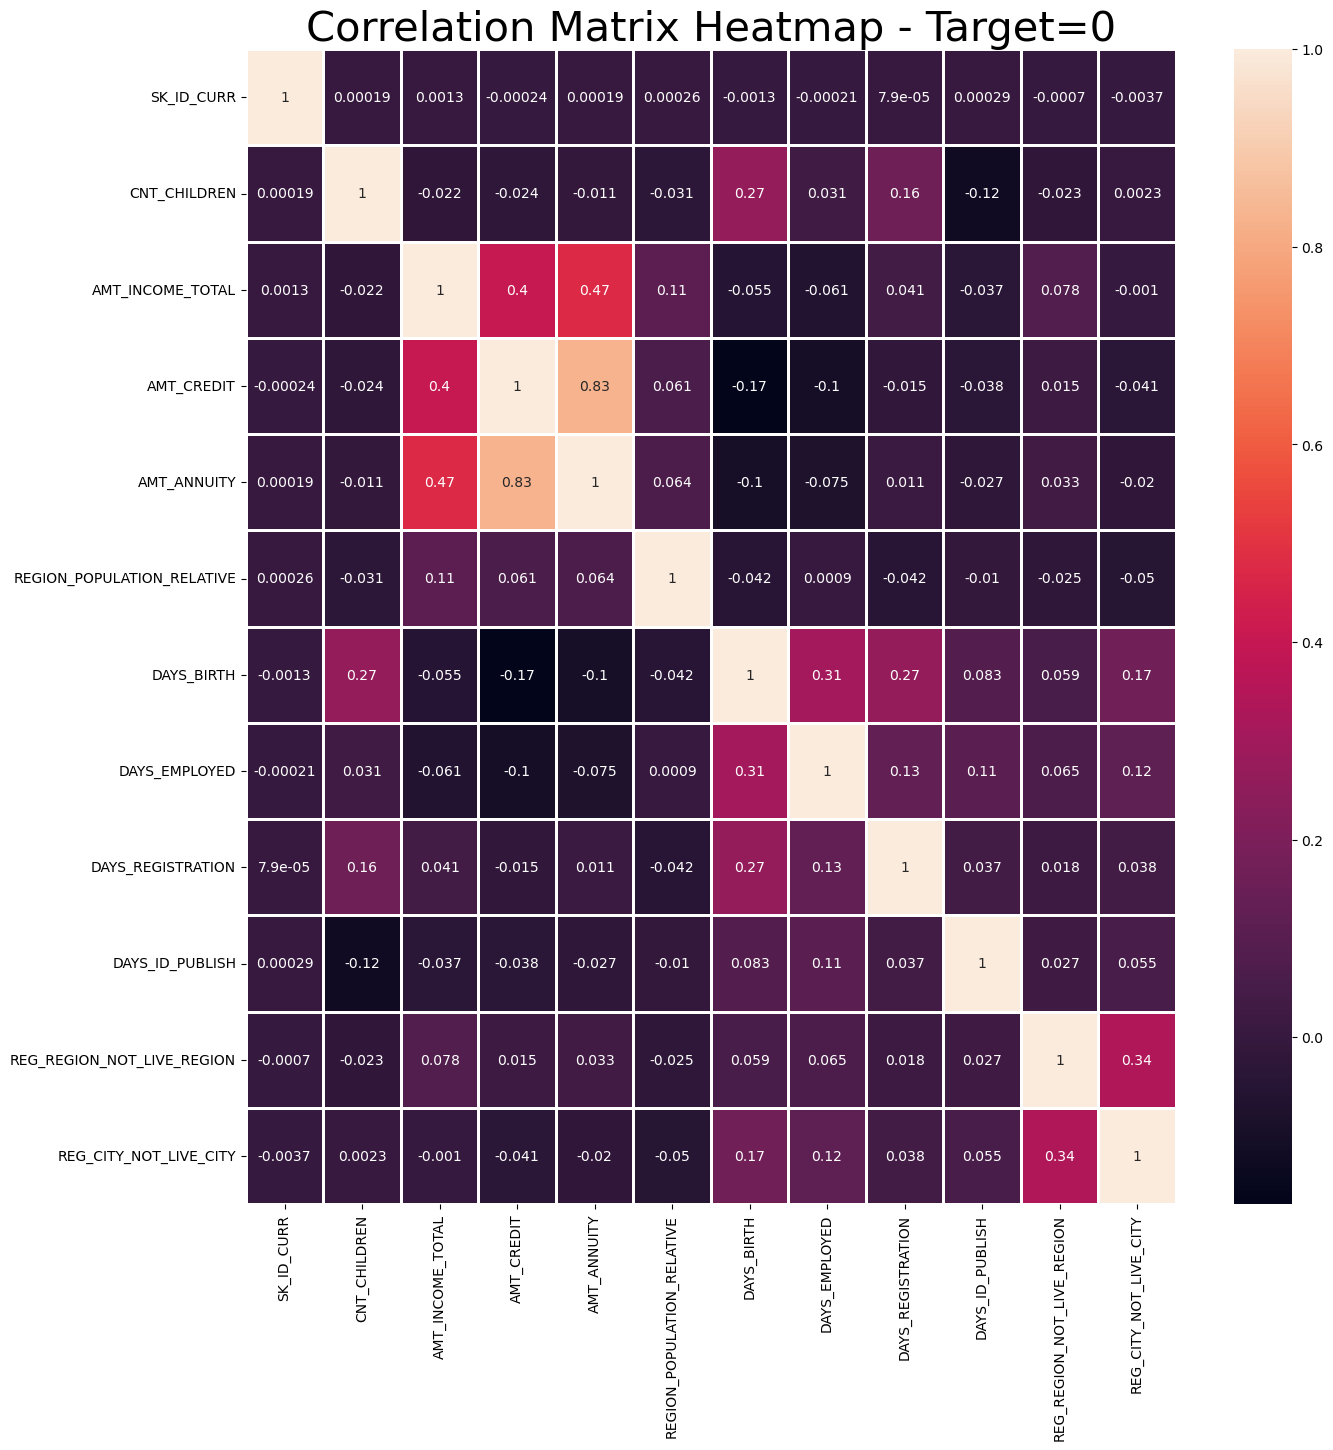

In [1703]:
plt.figure(figsize=(15,15))
sns.heatmap(target0_corr,annot=True, linewidths=1,)
plt.title("Correlation Matrix Heatmap - Target=0",fontsize=30)
plt.savefig("heatmap_target0.png")
plt.show()

#### Observations: 
1. AMT_CREDIT and AMT_ANNUITY (0.83): There is a very strong positive correlation between the amount of credit and the annuity. This suggests that higher credit amounts are associated with higher annuity payments.
2. AMT_INCOME_TOTAL and AMT_ANNUITY (0.47): Income has a moderate positive correlation with annuity payments, indicating that higher income levels are linked to higher annuity amounts.
3. AMT_INCOME_TOTAL and AMT_CREDIT (0.40): A moderate positive correlation indicates that as income increases, the amount of credit tends to increase as well.
4. DAYS_EMPLOYED and AMT_CREDIT (-0.1): This indicates that as days employed decrease (or as unemployment increases), the amount of credit tends to decrease.
5. DAYS_BIRTH and AMT_CREDIT (-0.17): Older individuals might have lower credit amounts, potentially reflecting changes in credit needs as people age.

#### Analysis of Correlation for Target=1

In [716]:
numerical_df_target1 = df_target1.select_dtypes(include=['int64','float64'])

In [718]:
numerical_df_target1.drop(columns="TARGET", inplace=True)

In [720]:
target1_corr=numerical_df_target1.corr(method='spearman')

In [725]:
target1_corr

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY
SK_ID_CURR,1.000000,-0.006826,-0.002939,-0.005872,-0.007820,0.006252,-0.005205,-0.004799,0.005956,-0.002580,-0.004328,0.007820
CNT_CHILDREN,-0.006826,1.000000,-0.039123,0.000427,0.015133,-0.029682,0.175025,0.006823,0.110854,-0.091042,-0.035213,-0.016072
AMT_INCOME_TOTAL,-0.002939,-0.039123,1.000000,0.364559,0.428947,0.058005,-0.103026,-0.053798,0.011378,-0.051113,0.075615,-0.003813
AMT_CREDIT,-0.005872,0.000427,0.364559,1.000000,0.812093,0.043545,-0.200718,-0.107605,-0.021973,-0.065143,0.015043,-0.030974
AMT_ANNUITY,-0.007820,0.015133,0.428947,0.812093,1.000000,0.028666,-0.100200,-0.060193,0.019762,-0.044128,0.029646,-0.011744
REGION_POPULATION_RELATIVE,0.006252,-0.029682,0.058005,0.043545,0.028666,1.000000,-0.044444,-0.015246,-0.033490,-0.017779,-0.032702,-0.057239
DAYS_BIRTH,-0.005205,0.175025,-0.103026,-0.200718,-0.100200,-0.044444,1.000000,0.256870,0.192350,0.146246,0.046320,0.145884
DAYS_EMPLOYED,-0.004799,0.006823,-0.053798,-0.107605,-0.060193,-0.015246,0.256870,1.000000,0.086286,0.104244,0.069566,0.118869
DAYS_REGISTRATION,0.005956,0.110854,0.011378,-0.021973,0.019762,-0.033490,0.192350,0.086286,1.000000,0.061563,0.006362,0.015831
DAYS_ID_PUBLISH,-0.002580,-0.091042,-0.051113,-0.065143,-0.044128,-0.017779,0.146246,0.104244,0.061563,1.000000,0.024860,0.048184


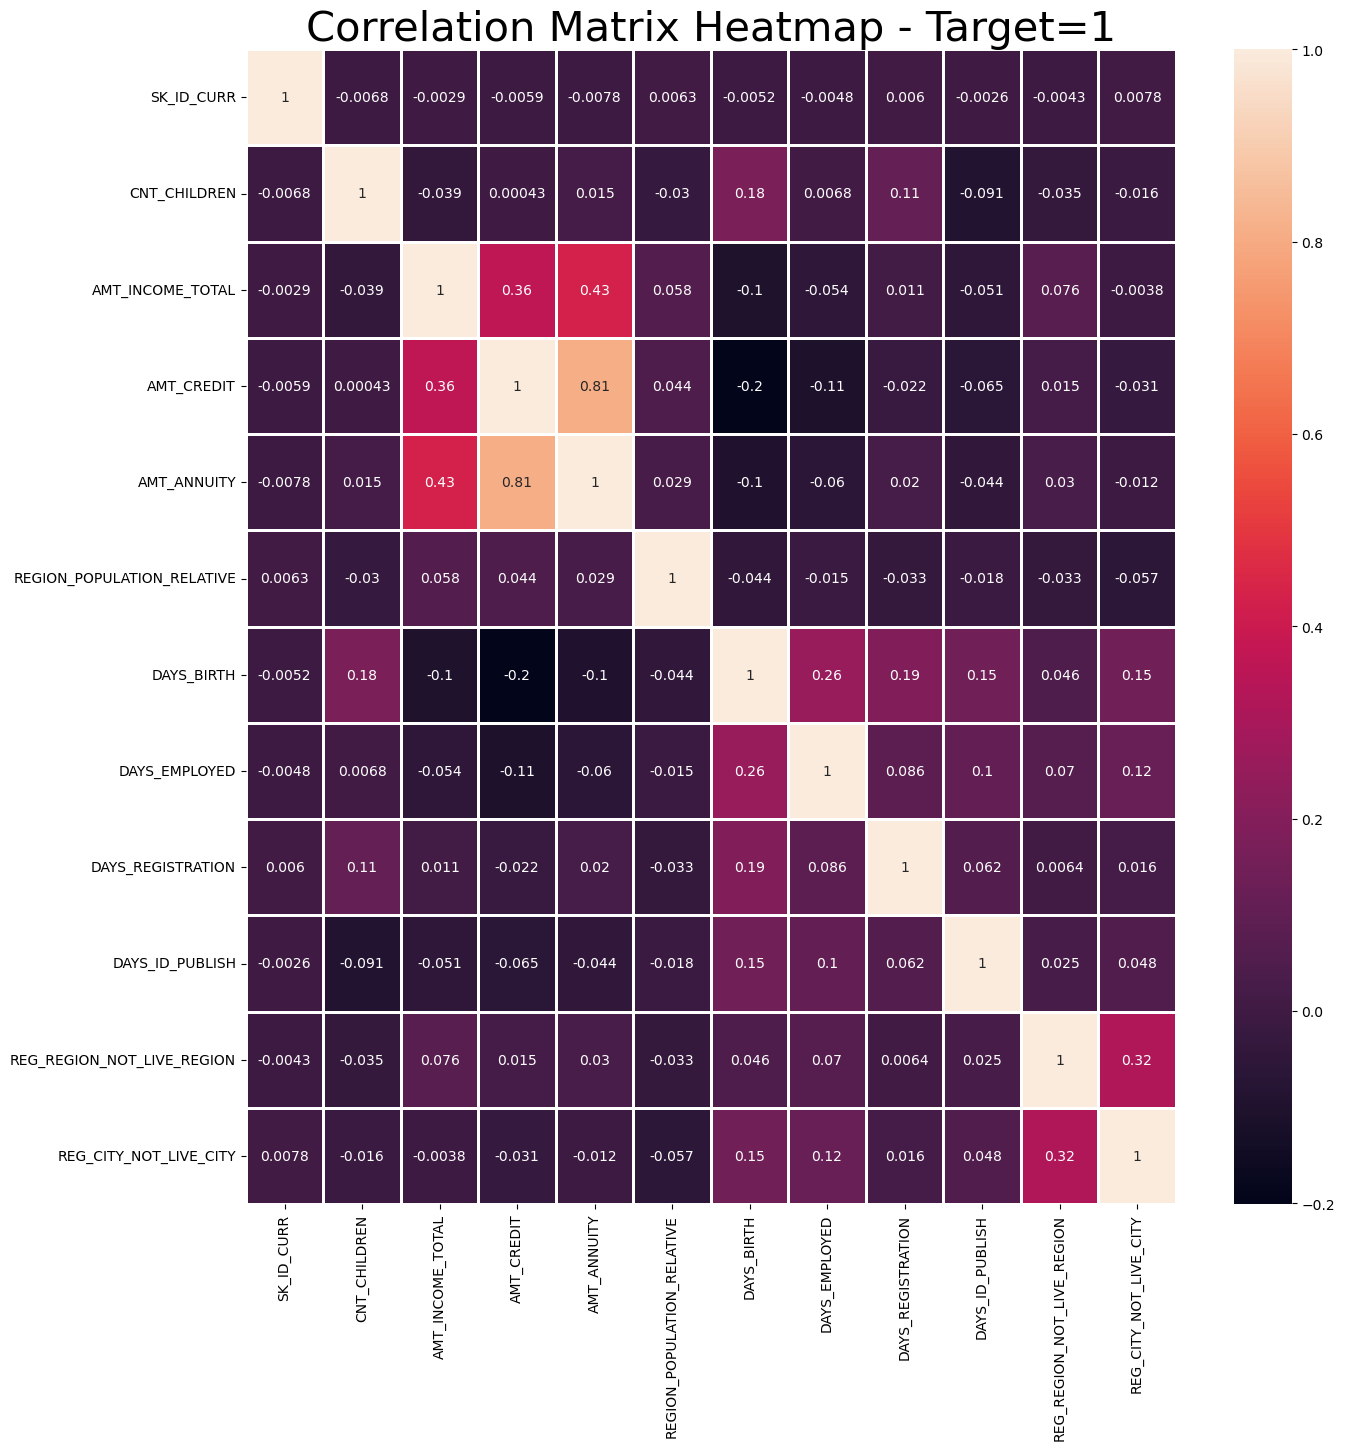

In [1701]:
plt.figure(figsize=(15,15))
sns.heatmap(target1_corr,annot=True, linewidths=1,)
plt.title("Correlation Matrix Heatmap - Target=1",fontsize=30)
plt.savefig("heatmap_target1.png")
plt.show()

#### Observations: 
1. AMT_CREDIT and AMT_ANNUITY (0.81): There is a very strong positive correlation between the amount of credit and the annuity, indicating that higher credit amounts are associated with higher annuity payments.
2. AMT_INCOME_TOTAL and AMT_ANNUITY (0.43): A moderate positive correlation suggests that individuals with higher incomes tend to have higher annuity payments.
3. AMT_INCOME_TOTAL and AMT_CREDIT (0.36): This indicates that higher income levels are linked to higher credit amounts.
4. DAYS_EMPLOYED and AMT_CREDIT (-0.20): This indicates that as days employed decrease (or as unemployment increases), the amount of credit tends to decrease.
5. DAYS_BIRTH and AMT_CREDIT (-0.20): Older individuals may have lower amounts of credit, which could reflect a shift in financial needs as people age.

#### Multivariate analysis - target=0

In [740]:
df_target0.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
WEEKDAY_APPR_PROCESS_START      object
REG_REGION_NOT_LIVE_REGION       int64
REG_CITY_NOT_LIVE_CITY           int64
ORGANIZATION_TYPE               object
Income_Slot                   category
Credit_Category               category
dtype: object

In [985]:
def multivar_plot(df,x_cat,y_cont,title,xlabel,ylabel,size=(8,8)):
    plt.figure(figsize=size)    
    plt.xticks(rotation=45)
    plt.yscale('log')
    sns.barplot(data=df, x=x_cat, y=y_cont,hue='NAME_FAMILY_STATUS',ci="sd")
    plt.legend(title='Family Status',fontsize='x-small', title_fontsize='small')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

#### Comapring Income

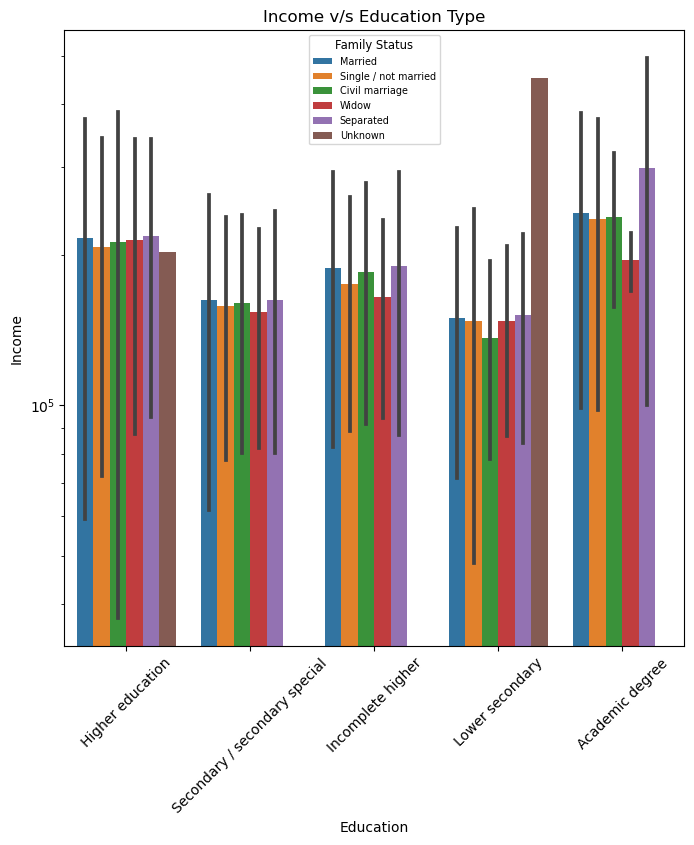

In [988]:
multivar_plot(df_target0,"NAME_EDUCATION_TYPE","AMT_INCOME_TOTAL", "Income v/s Education Type","Education","Income")

Income is highest amongst people with an Academic degree and are separated and lowest amongst lower secondary and civil marriage

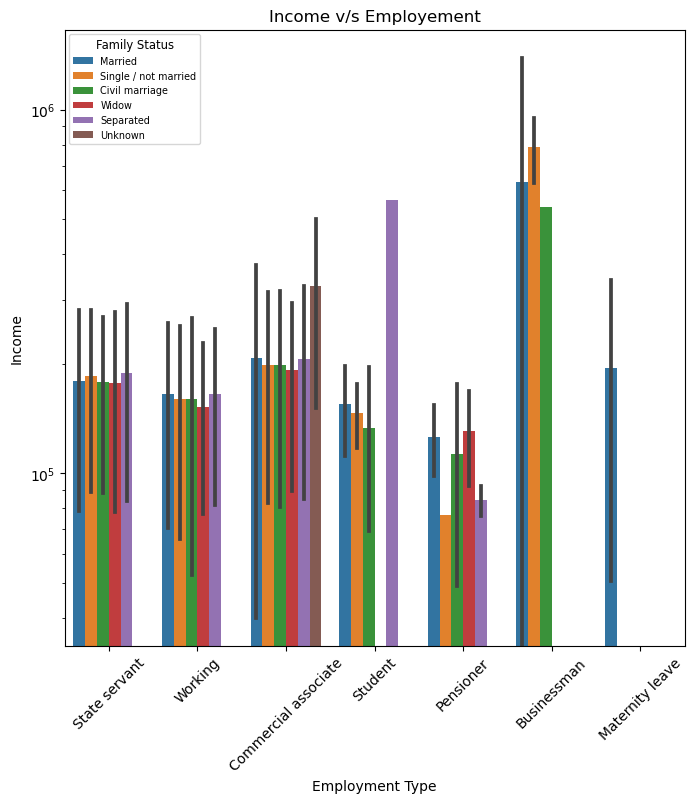

In [991]:
multivar_plot(df_target0,"NAME_INCOME_TYPE","AMT_INCOME_TOTAL", "Income v/s Employement","Employment Type","Income")

Income is generally seen to be highest among bussinessmen who are single and lowest amongst Pensioners who are single.

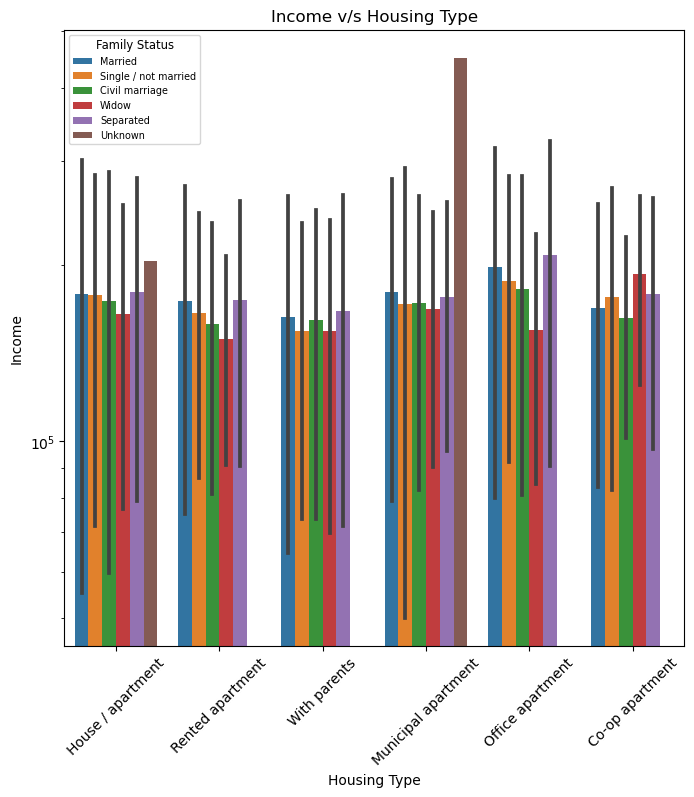

In [921]:
multivar_plot(df_target0,"NAME_HOUSING_TYPE","AMT_INCOME_TOTAL", "Income v/s Housing Type","Housing Type","Income")

The highest income is seen to be amongst people living in House/Apartment and Muncipal Buildings and lowest in widows living with parents

#### Comparing Credit Amount

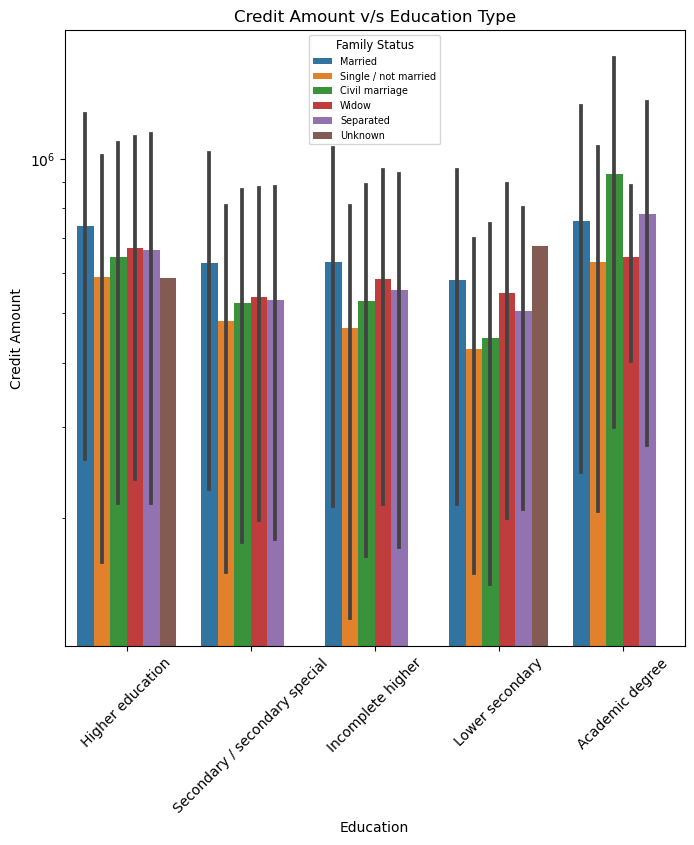

In [914]:
multivar_plot(df_target0,"NAME_EDUCATION_TYPE","AMT_CREDIT", "Credit Amount v/s Education Type","Education","Credit Amount")

Highest credit amount is taken by people with Academic degree and in civil marriage and lowest in single people with lower secondary education

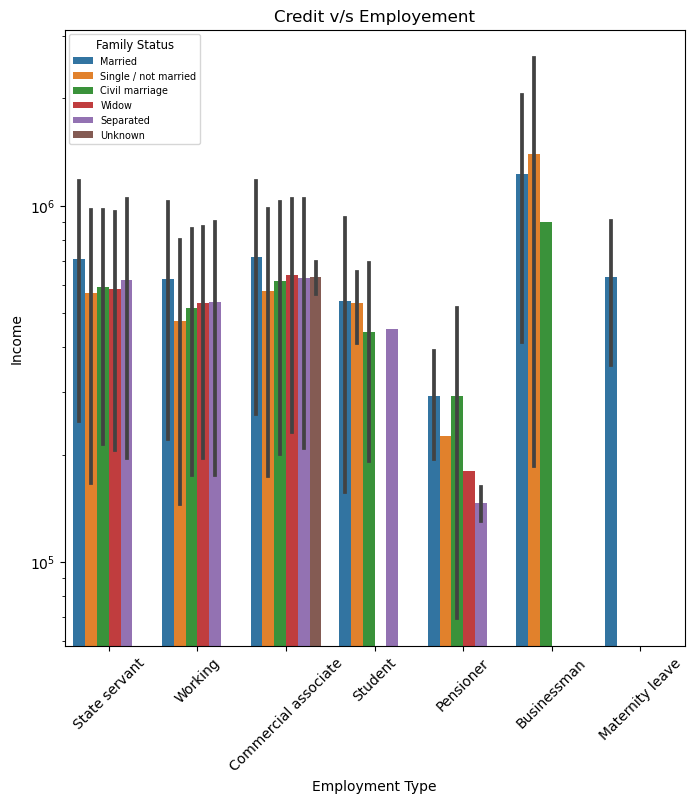

In [923]:
multivar_plot(df_target0,"NAME_INCOME_TYPE","AMT_CREDIT", "Credit v/s Employement","Employment Type","Income")

Highest credit amount is seen in Single businessmen and lowest amongst separated pensioners

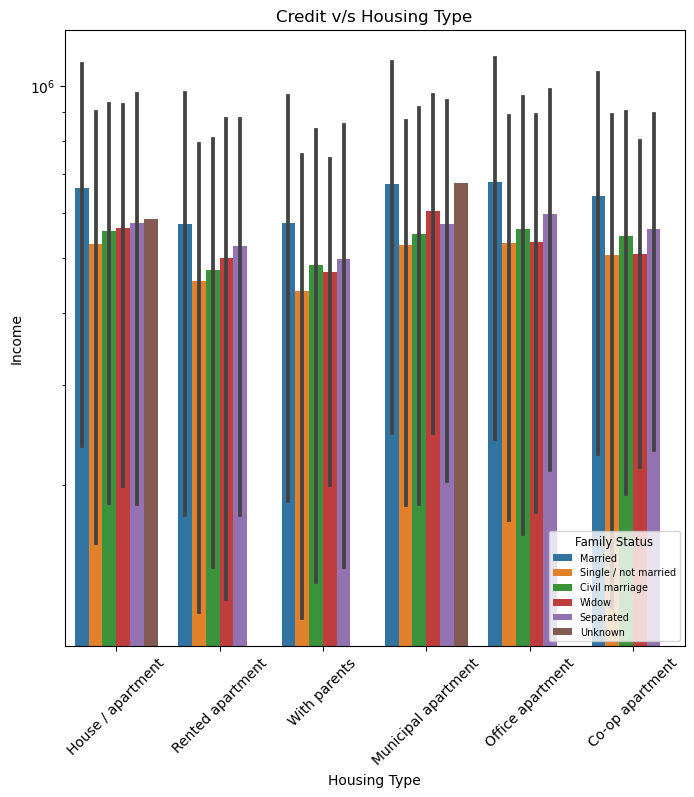

In [925]:
multivar_plot(df_target0,"NAME_HOUSING_TYPE","AMT_CREDIT", "Credit v/s Housing Type","Housing Type","Income")

Credit is highest for married people in own house/apartment and lowest in single people living with parents

#### Multivariate analysis - target=1

#### Comparing income

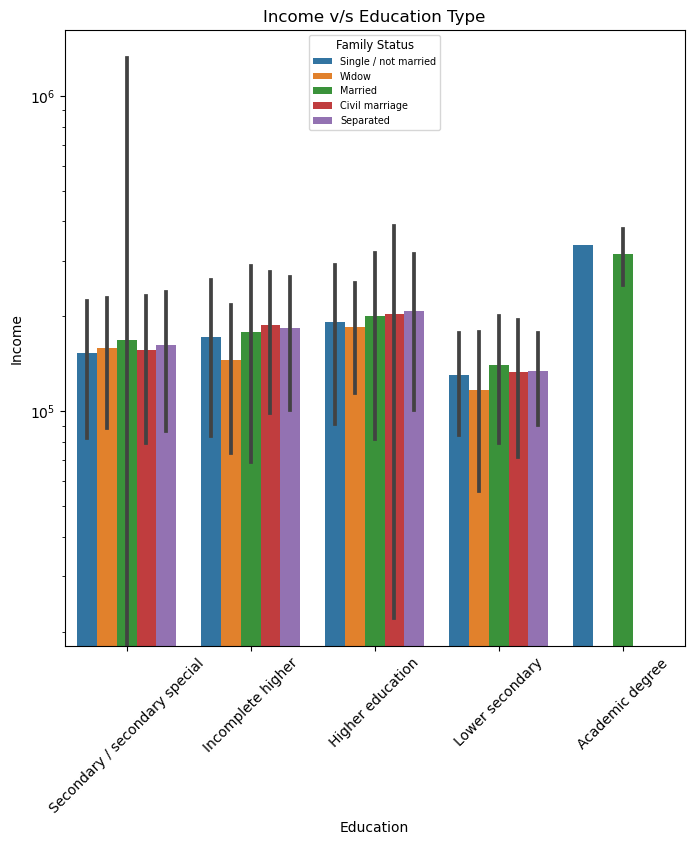

In [949]:
multivar_plot(df_target1,"NAME_EDUCATION_TYPE","AMT_INCOME_TOTAL", "Income v/s Education Type","Education","Income")

Income is highest amongst Married people with Academic degree and lowest for single people with lower secondary education

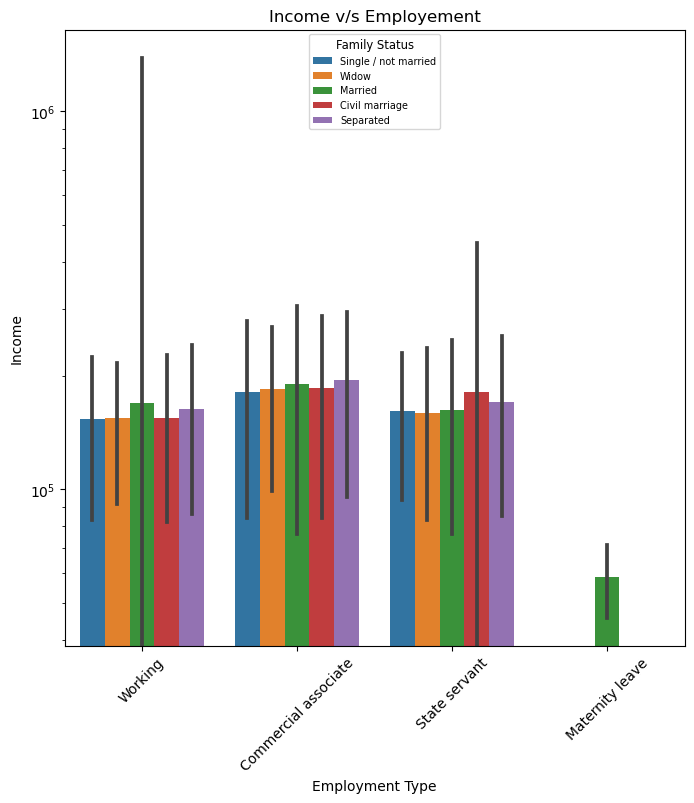

In [951]:
multivar_plot(df_target1,"NAME_INCOME_TYPE","AMT_INCOME_TOTAL", "Income v/s Employement","Employment Type","Income")

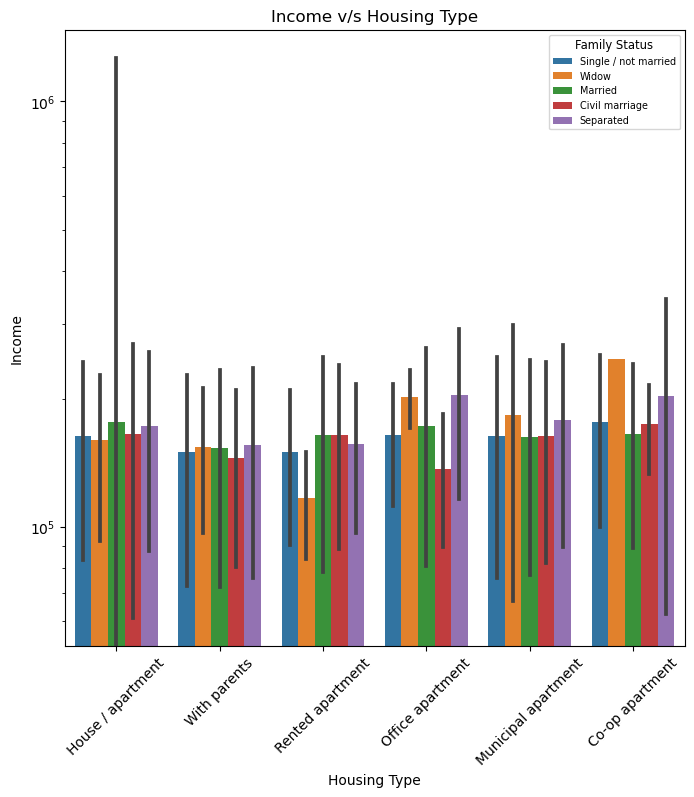

In [953]:
multivar_plot(df_target1,"NAME_HOUSING_TYPE","AMT_INCOME_TOTAL", "Income v/s Housing Type","Housing Type","Income")

Highest income is amongst single people in co-op apartmentsand lowest in single people living with parents

#### Comparing Credit

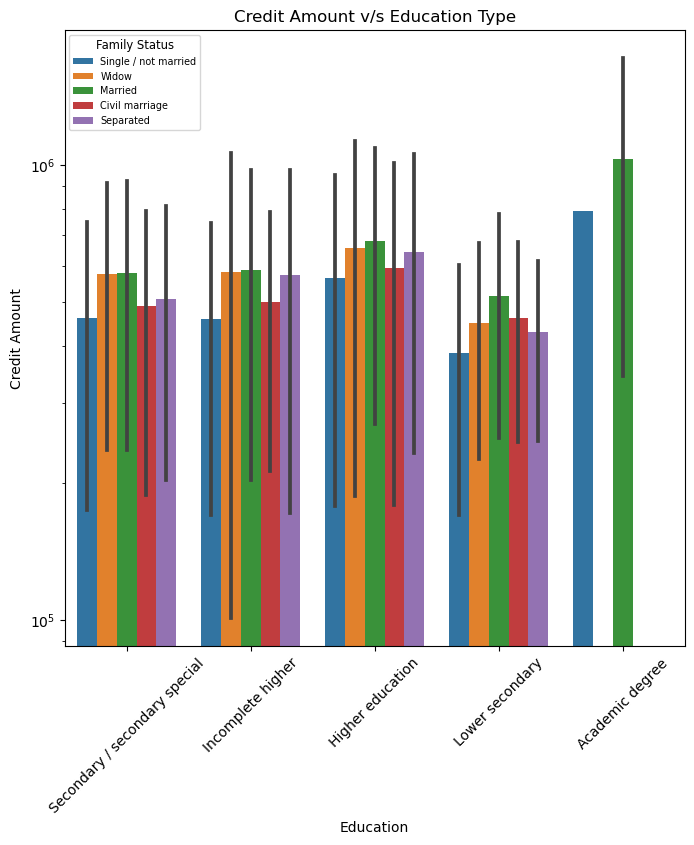

In [955]:
multivar_plot(df_target1,"NAME_EDUCATION_TYPE","AMT_CREDIT", "Credit Amount v/s Education Type","Education","Credit Amount")

Highest credit is taken by married people with academic degrees.

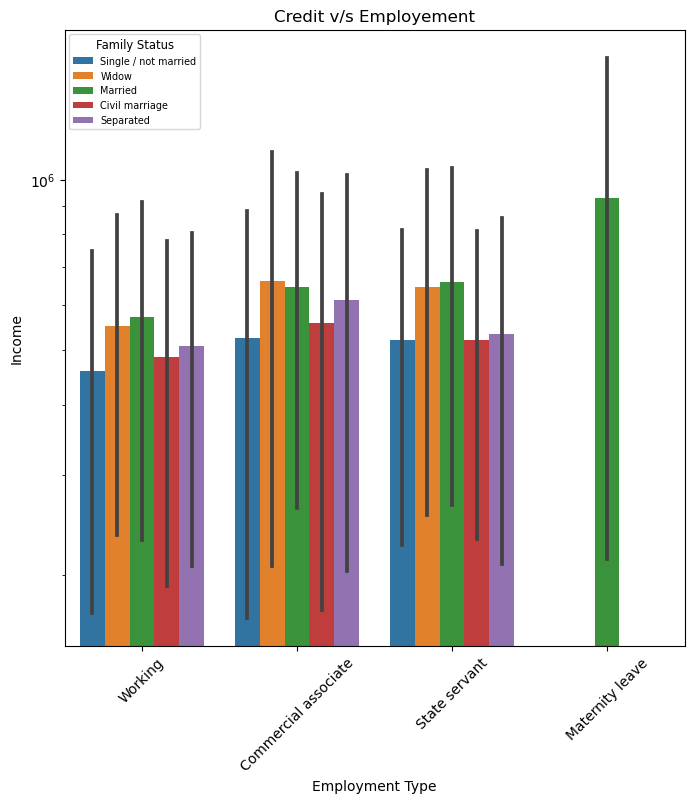

In [957]:
multivar_plot(df_target1,"NAME_INCOME_TYPE","AMT_CREDIT", "Credit v/s Employement","Employment Type","Income")

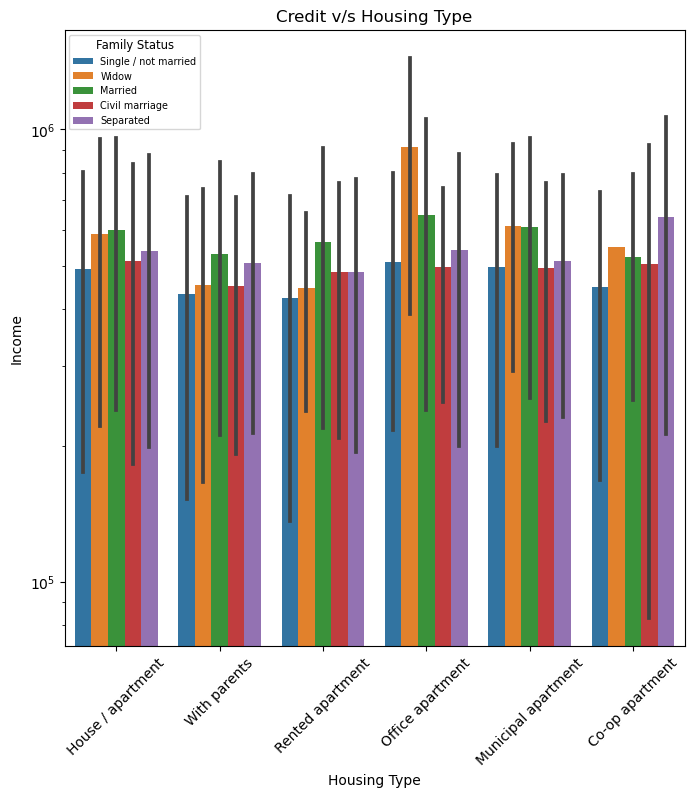

In [959]:
multivar_plot(df_target1,"NAME_HOUSING_TYPE","AMT_CREDIT", "Credit v/s Housing Type","Housing Type","Income")

#### Observations - Target =0:
1. Income trends reveal distinct patterns across demographic and social groups. Income is highest among individuals with an academic degree who are separated, while it is lowest among those with only lower secondary education who are in a civil marriage. Businessmen who are single generally have the highest incomes, contrasted by single pensioners who earn the least. Furthermore, people living in houses or apartments and municipal buildings tend to have the highest incomes, while widowed individuals residing with parents experience the lowest income levels.

2. The amount of credit taken varies across education, marital status, and living arrangements. The highest credit amounts are associated with individuals who hold an academic degree and are in a civil marriage, while the lowest are among single people with only lower secondary education. Single businessmen generally take the highest credit, contrasting with separated pensioners who take the least. Additionally, married individuals residing in their own house or apartment tend to secure the highest credit, whereas single people living with parents take the lowest.

#### Observations - Target=1
1. Income levels show significant variation across marital status, education, and living arrangements. Married individuals with an academic degree have the highest income, while single individuals with only lower secondary education have the lowest. Among single individuals, those residing in co-op apartments report the highest income, whereas those living with parents have the lowest.
   
2. Highest credit is taken by married people with academic degrees.

In [1485]:
df2=pd.read_csv("previous_application.csv")

In [1346]:
### Cleaning dataset of previous applications
df2

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [1348]:
df2.dtypes.value_counts()

object     16
float64    15
int64       6
Name: count, dtype: int64

In [1350]:
df2.shape

(1670214, 37)

In [1486]:
df2empty_col=df2.isnull().sum()
df2empty_col=df2empty_col[df2empty_col.values>(0.3*len(df2empty_col))]

In [1489]:
len(df2empty_col)

15

In [1491]:
df2.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [1493]:
df2.drop(labels=df2empty_col.index,axis=1,inplace=True)

In [1494]:
df2.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
dtype: int64

In [1497]:
df2.dtypes.value_counts()

object     14
int64       6
float64     2
Name: count, dtype: int64

In [1499]:
df2.shape

(1670214, 22)

In [1501]:
df2_object_cols=df2.select_dtypes(include='object').columns
df2_int_cols=df2.select_dtypes(include='int64').columns
df2_float_cols=df2.select_dtypes(include='float64').columns

In [1503]:
for i in df2_object_cols:
    print(df2[i].value_counts())
    print("____________________________________________")

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64
____________________________________________
WEEKDAY_APPR_PROCESS_START
TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: count, dtype: int64
____________________________________________
FLAG_LAST_APPL_PER_CONTRACT
Y    1661739
N       8475
Name: count, dtype: int64
____________________________________________
NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans          

We can see null values as "XNA" and "XAP" in multiple rows.

In [1506]:
del_nul_cols=['NAME_CASH_LOAN_PURPOSE','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP']
len(del_nul_cols)

8

Since these 8 columns have majority of values as null we will drop them, the other two colums with "XNA" will be imputed as below

In [1509]:
df2["NAME_CLIENT_TYPE"]=df2.apply(lambda x: "Repeater" if x["NAME_CLIENT_TYPE"]=="XNA" else x["NAME_CLIENT_TYPE"], axis =1)

In [1510]:
df2["NAME_CLIENT_TYPE"].value_counts()

NAME_CLIENT_TYPE
Repeater     1233202
New           301363
Refreshed     135649
Name: count, dtype: int64

In [1511]:
df2["NAME_CONTRACT_TYPE"]=df2.apply(lambda x: "Cash loans" if x["NAME_CONTRACT_TYPE"]=="XNA" else x["NAME_CONTRACT_TYPE"], axis =1)

In [1512]:
df2["NAME_CONTRACT_TYPE"].value_counts()

NAME_CONTRACT_TYPE
Cash loans         747899
Consumer loans     729151
Revolving loans    193164
Name: count, dtype: int64

In [1430]:
del_nul_cols

['NAME_CASH_LOAN_PURPOSE',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP']

In [1519]:
 # removing 'XNA' & 'XAP' collumn values
df2.drop(df2[df2["NAME_CASH_LOAN_PURPOSE"]=='XNA'].index, inplace=True)
df2.drop(df2[df2["NAME_CASH_LOAN_PURPOSE"]=='XAP'].index, inplace=True)

In [1525]:
df2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION',
       'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP'],
      dtype='object')

In [1535]:
merged_df=pd.merge(left=df1,right=df2,how='inner',on='SK_ID_CURR',suffixes=('_df1','_df2'))

In [1565]:
list(merged_df.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE_df1',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_df1',
 'AMT_ANNUITY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'WEEKDAY_APPR_PROCESS_START_df1',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'ORGANIZATION_TYPE',
 'Income_Slot',
 'Credit_Category',
 'SK_ID_PREV',
 'NAME_CONTRACT_TYPE_df2',
 'AMT_APPLICATION',
 'AMT_CREDIT_df2',
 'WEEKDAY_APPR_PROCESS_START_df2',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'NAME_

In [1549]:
strings=list(merged_df.columns)

In [1567]:
#Identifying and renaming new Collumns
pattern="^[A-Za-z0-9/_]+_df.$"
sample=[s for s in strings if re.search(pattern, s)]
sample

6

In [1591]:
merged_df.shape

(51420, 46)

In [1597]:
#Removing irrelevant collumns

In [ ]:
merged_df.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 'REG_CITY_NOT_LIVE_CITY','WEEKDAY_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1, inplace = True)

In [1613]:
merged_df.drop(['SK_ID_PREV'],axis=1, inplace = True)

In [1615]:
collumn_name_map={
    "NAME_CONTRACT_TYPE_df1":"NAME_CONTRACT_TYPE",
    "NAME_CONTRACT_TYPE_df2": "NAME_CONTRACT_TYPE_PREV",
    "AMT_CREDIT_df1":"AMT_CREDIT",
    "WEEKDAY_APPR_PROCESS_START_df1":"WEEKDAY_APPR_PROCESS_START",
    "AMT_CREDIT_df2":"AMT_CREDIT_PREV",
    "WEEKDAY_APPR_PROCESS_START_df2":"WEEKDAY_APPR_PROCESS_START_PREV"
}
merged_df.rename(collumn_name_map, axis=1, inplace=True)

In [1621]:
merged_df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'ORGANIZATION_TYPE', 'Income_Slot', 'Credit_Category',
       'NAME_CONTRACT_TYPE_PREV', 'AMT_APPLICATION', 'AMT_CREDIT_PREV',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP'],
      dtype='object')

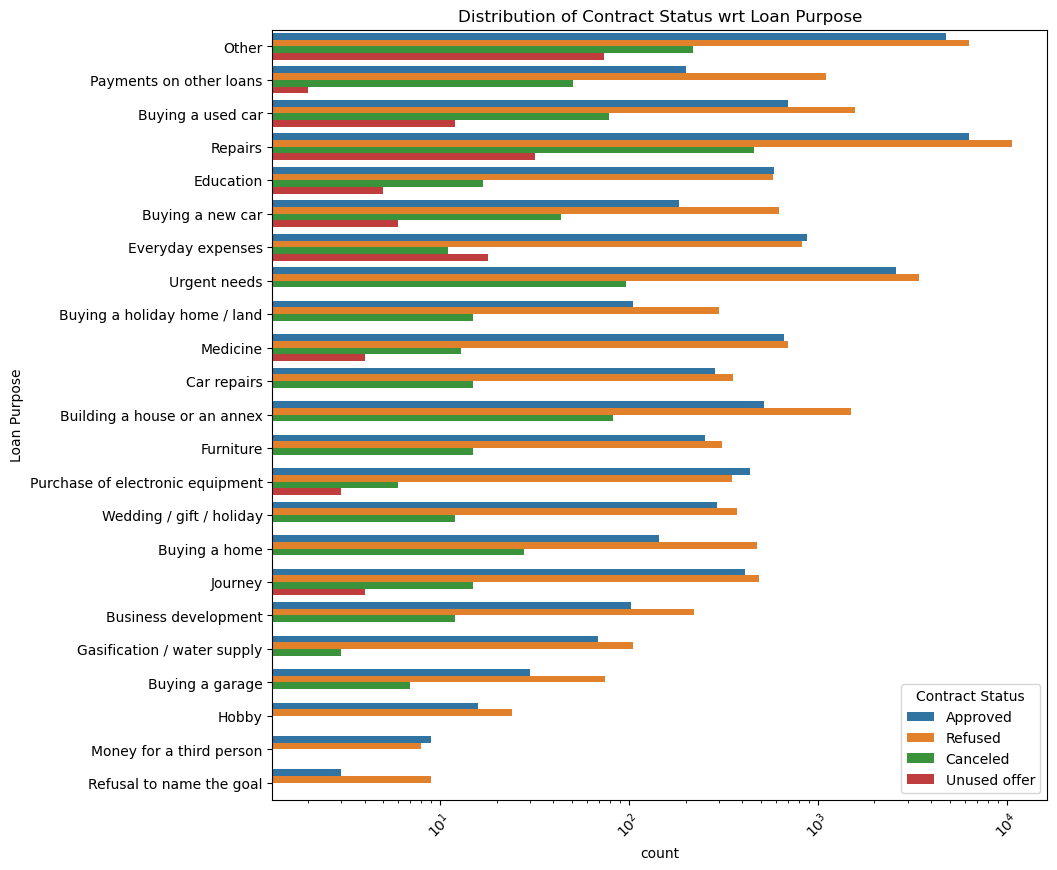

In [1715]:
plt.figure(figsize=(10,10))
plt.title("Distribution of Contract Status wrt Loan Purpose")
plt.xticks(rotation=45)
plt.xscale('log')
sns.countplot(data=merged_df,y="NAME_CASH_LOAN_PURPOSE", hue="NAME_CONTRACT_STATUS")
plt.ylabel("Loan Purpose")
plt.legend(title="Contract Status")
plt.savefig("Distribution of Contract Status wrt Loan Purpose.png")
plt.show()

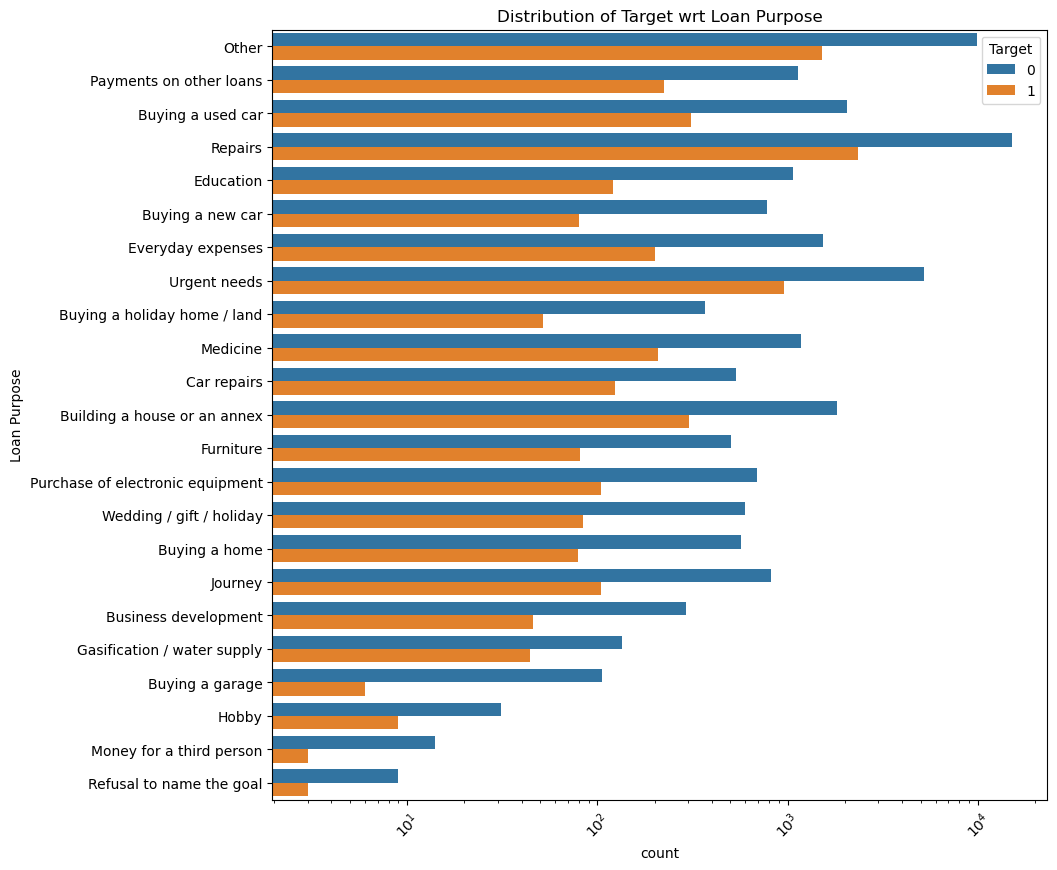

In [1717]:
plt.figure(figsize=(10,10))
plt.title("Distribution of Target wrt Loan Purpose")
plt.xticks(rotation=45)
plt.xscale('log')
sns.countplot(data=merged_df,y="NAME_CASH_LOAN_PURPOSE", hue="TARGET")
plt.ylabel("Loan Purpose")
plt.legend(title="Target")
plt.savefig("Distribution of Target wrt Loan Purpose.png")
plt.show()

Most number of defaulters took credit in name of Repairs as their Purpose. The most number of loan rejections where also done for the same category

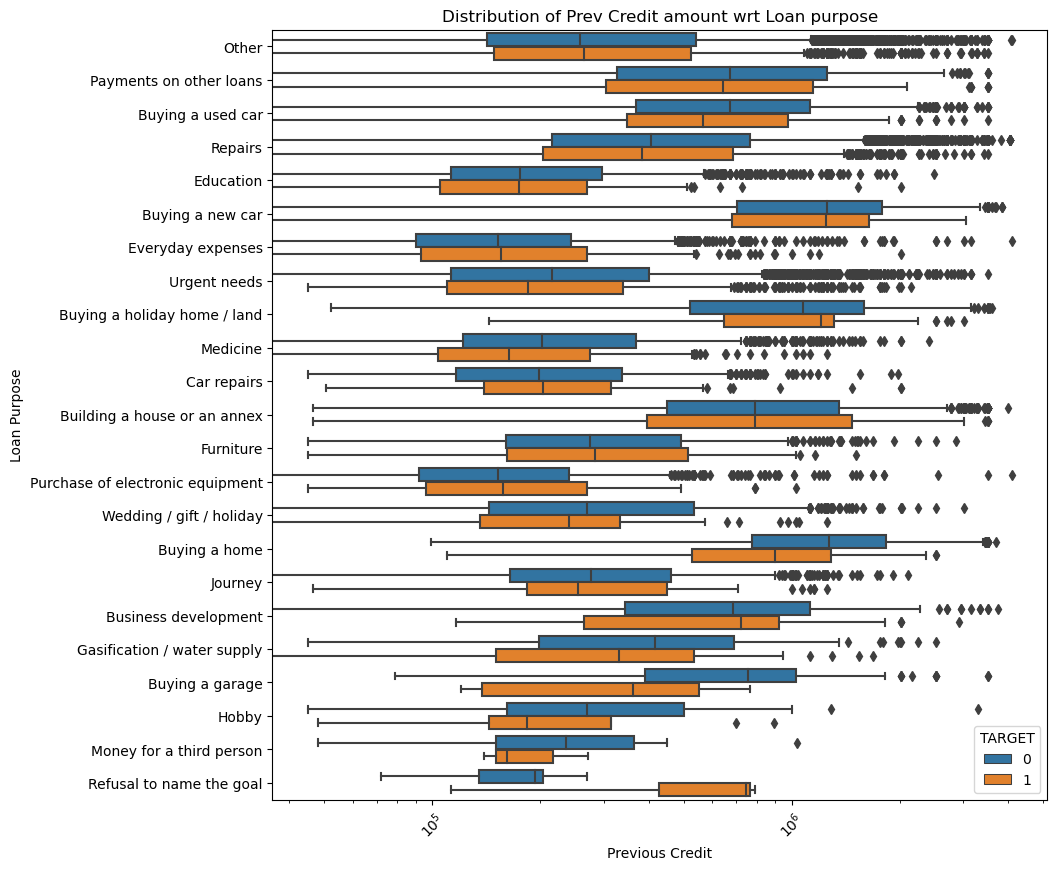

In [1719]:
plt.figure(figsize=(10,10))
plt.title("Distribution of Prev Credit amount wrt Loan purpose")
plt.xticks(rotation=45)
plt.xscale('log')
sns.boxplot(data=merged_df,x='AMT_CREDIT_PREV',y="NAME_CASH_LOAN_PURPOSE", hue="TARGET")
plt.ylabel("Loan Purpose")
plt.xlabel("Previous Credit")
plt.savefig("Distribution of Prev Credit amount wrt Loan purpose.png")
plt.show()

Loans where taken mostly for the purposes of Buying a home, Buying a new car and Buying a holiday home/ piece of land
Amongst the peope struggling to pay back, most of them took the loan for the purpose of Buying a new car and the ones who paid back successfully took for Buying a new home.

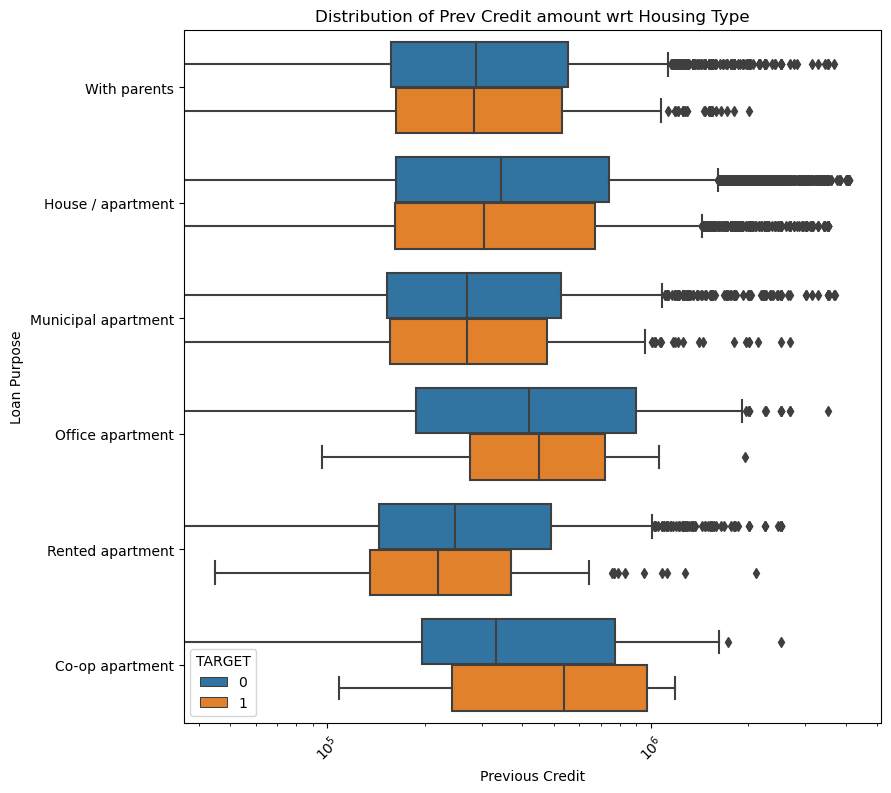

In [1721]:
plt.figure(figsize=(9,9))
plt.title("Distribution of Prev Credit amount wrt Housing Type")
plt.xticks(rotation=45)
plt.xscale('log')
sns.boxplot(data=merged_df,x='AMT_CREDIT_PREV',y="NAME_HOUSING_TYPE",hue="TARGET")
plt.ylabel("Loan Purpose")
plt.xlabel("Previous Credit")
plt.legend(title="TARGET")
plt.savefig("Distribution of Prev Credit amount wrt Housing Type.png")
plt.show()

Here, highest credit taken by people who later struglled to apy back were from Co-op apartments and the ones who paid back where in Office Apartment.

#### Observation: 
In the credit risk analysis, the dataset reveals specific patterns in loan purpose and repayment outcomes. The majority of defaulters took credit with the purpose of "Repairs," which also saw the highest number of loan rejections. Loans were predominantly taken for purposes such as buying a home, buying a new car, and purchasing a holiday home or piece of land. Among those struggling with repayment, most had borrowed to buy a new car, whereas successful payers largely borrowed to buy a new home. Notably, the highest credit taken by those who later struggled to repay was from individuals in co-op apartments, while those who successfully repaid were primarily located in office apartments.

### Conclusion :
1. Focus on High-Education Applicants: Prioritize loan approvals for married individuals with academic degrees, as they exhibit higher income and repayment capacity.
2. Evaluate Housing Type: Assess applicants' housing; those in co-op apartments show higher default rates, while those in office apartments are more likely to repay successfully.
3. Loan Purpose Significance: Loans for repairs and buying new cars carry higher default risks. Consider stricter scrutiny or limits on these types, while loans for buying homes are more likely to succeed.
4. Credit Amount Caution: Exercise caution when approving high credit amounts for applicants with lower secondary education or those living with parents, especially if the loan purpose isn't asset-building.
5. Monitor Organization Types: Maintain oversight on applicants from Business Entity Type 2 and the Construction sector, as these groups show a notable association with repayment struggles.
6. Implementing these strategies can improve risk assessment and enhance the bank's loan approval process.
